In [1]:
import numpy as np
import sys
sys.path.append('tools/')
import basis as b
import grid as g

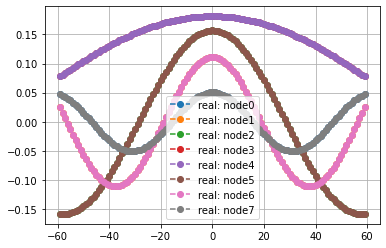

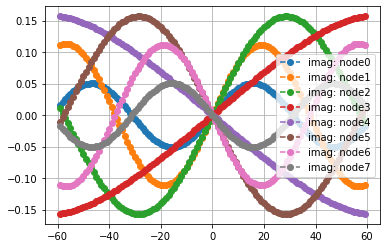

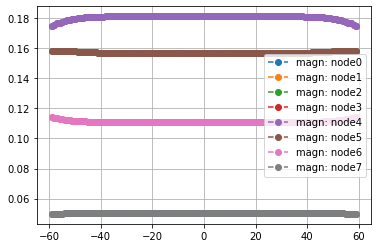

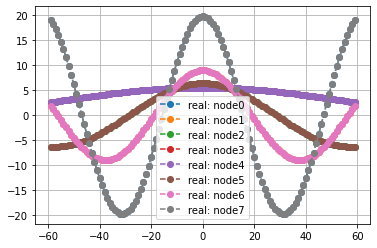

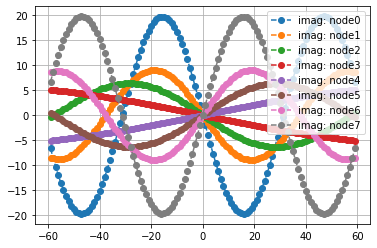

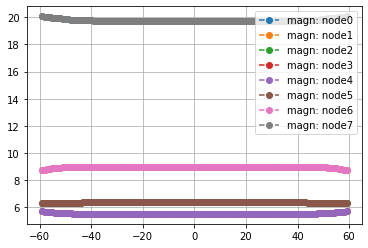

In [2]:
# Set up a grid
order, res = 8, 30
lobatto = False

L = 2.0 * np.pi
low, high = -L/2, L/2

basis = b.Basis1D(order, lobatto=lobatto)
grid = g.Grid1D(low=low, high=high, res=res, basis=basis, spectrum=True, linspace=True)

0.013535203918609063


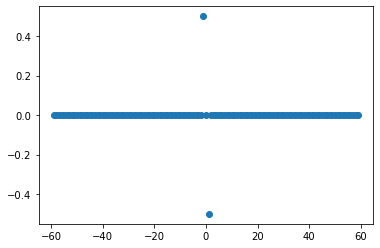

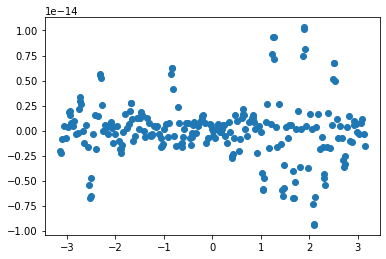

In [3]:
f = np.sin(grid.arr[1:-1, :])

# Look at grid transform array
transform_array = grid.spectral_transform.get() / res
# inverse_array = basis.inv_array

# build pseudo-inverse array
# inverse_array = np.linalg.pinv(transform_array.reshape(order * res, 4*res+1)).reshape(4*res+1, order, res)
inverse_array = np.exp(1j * np.tensordot(grid.arr[1:-1,:], grid.wave_numbers, axes=0))

apprx_identity = np.tensordot(transform_array, inverse_array, axes=([0,1], [0,1]))
print(np.linalg.norm(np.eye(inverse_array.shape[2]) - apprx_identity))

# print(transform_array.reshape(3 * 8, 13))
# print(inverse_array.reshape(3 * 8, 13))

# Transform it
spectrum = np.tensordot(transform_array, f, axes=([0, 1], [0, 1]))

import matplotlib.pyplot as plt
plt.figure()
plt.plot(grid.wave_numbers, np.imag(spectrum), 'o')
# plt.show()

inv_transform = np.tensordot(inverse_array, spectrum, axes=([2], [0]))

plt.figure()
plt.plot(grid.arr[1:-1,:].flatten(), np.real(inv_transform).flatten() - f.flatten(), 'o')
plt.show()

# print(transform_array)